### Import neccessary libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential, layers

In [83]:
import warnings
warnings.filterwarnings('ignore')

### Fetch the training and Testing data

In [17]:
damage_train = glob.glob('train_another/damage/*.jpeg')
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_train = glob.glob('train_another/no_damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

### Find the number of images of all classes in the Training set

In [25]:
print("Number of images in the training set are :\n")
print('Damage :',len(damage_train))
print('No Damage :',len(no_damage_train))

Number of images in the training set are :

Damage : 5000
No Damage : 5000


### Find the number of images of all classes in the testing set

In [29]:
print("Number of images in the testing set are :\n")
print('Damage :',len(damage_test))
print('No Damage :',len(no_damage_test))

Number of images in the testing set are :

Damage : 8000
No Damage : 1000


### Store all the images inside a list and create a list with the corresponding labels

#### Training

In [37]:
image = []
label = []

for i in damage_train:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage_train:
    img = plt.imread(i)
    image.append(img)
    label.append(1)



#### Testing

In [41]:
image_test = []
label_test = []

for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in no_damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set) and Plot them

#### Shuffle

In [44]:
image,label = shuffle(image,label)

In [49]:
image_test,label_test = shuffle(image_test,label_test)

#### Plot them after shuffling

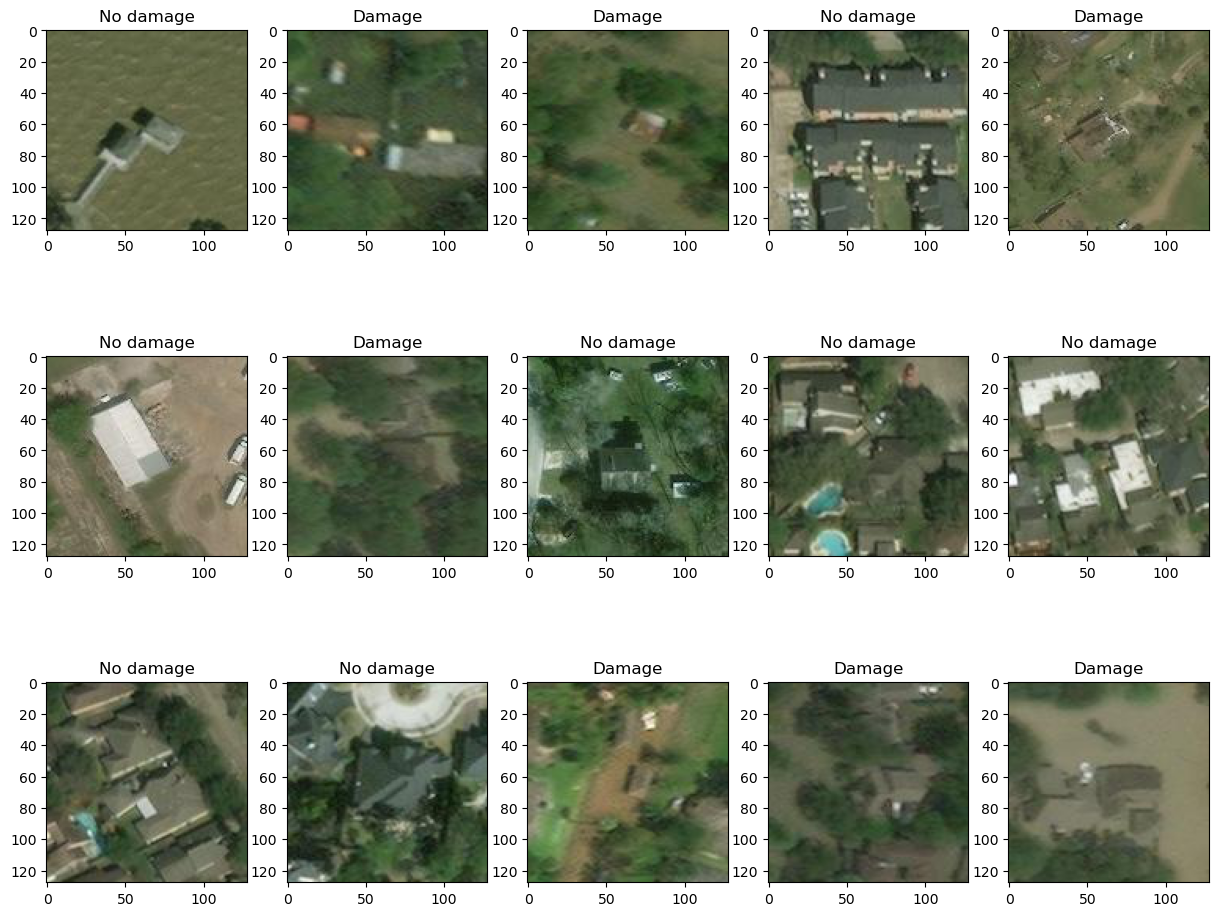

In [53]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if label[i] == 0:
        plt.title("Damage")
    elif label[i] == 1:
        plt.title("No damage")

### Check the shape of the  images in our list (Either from training or test set)

***Training***

In [57]:
for i in range(10):
    print(image[i].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


***Testing***

In [59]:
for i in range(10):
    print(image_test[i].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


### Create numpy arrays for images and labels in training and testing

In [65]:
X_train = np.array(image)
X_test = np.array(image_test)
y_train = np.array(label)
y_test = np.array(label_test)

#### Plot them

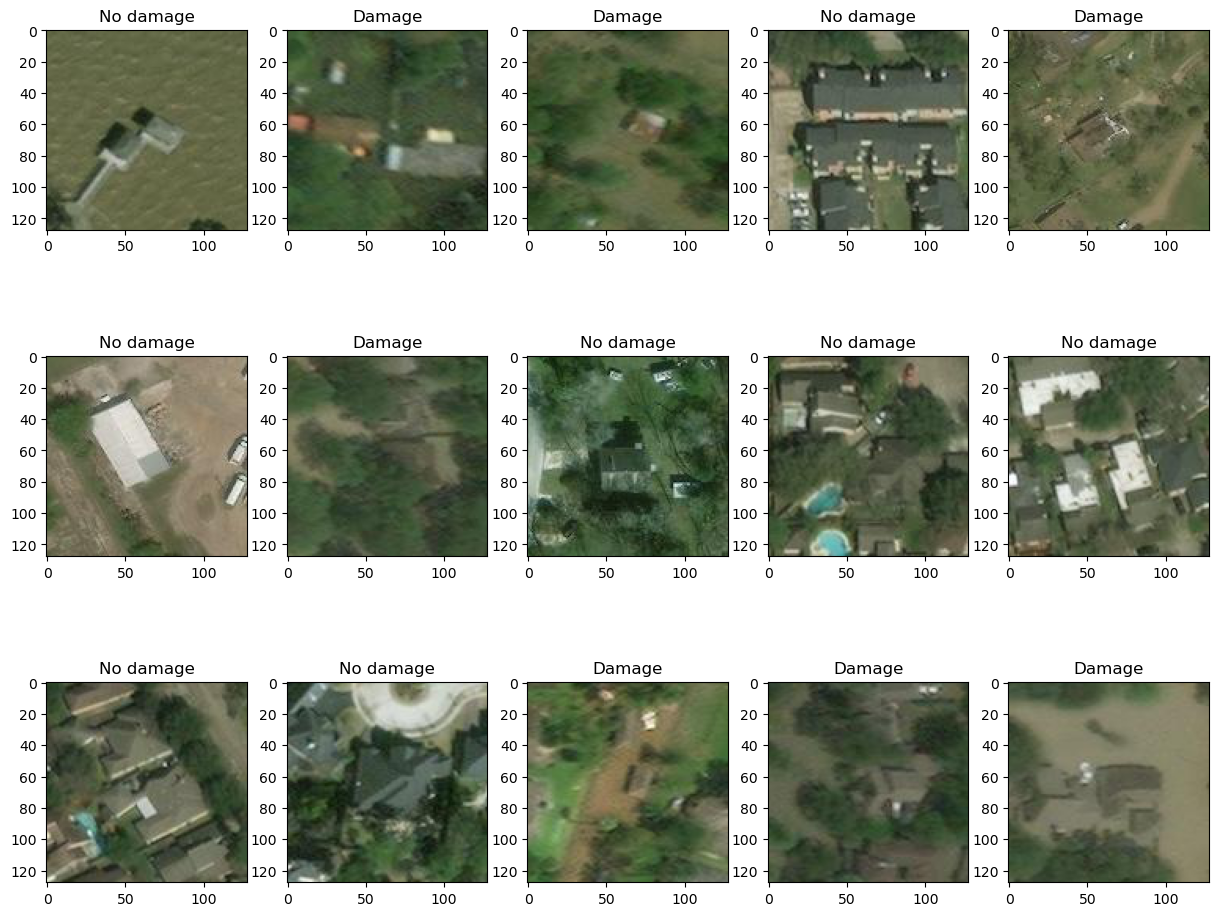

In [69]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title("Damage")
    elif y_train[i] == 1:
        plt.title("No damage")

###  To check the shape of X_train and X_test and y_train and y_test

In [75]:
print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (10000, 128, 128, 3)
Shape of X_test : (9000, 128, 128, 3)
Shape of y_train : (10000,)
Shape of y_test : (9000,)


### Create a keras Sequential model with convolution layers

In [85]:
model = Sequential()

model.add(layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(32, activation ='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

### Compile the model

In [89]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics =['accuracy'])

### Summary of the model

In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,850,465 (7.06 MB)

 Trainable params: 1,850,465 (7.06 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [97]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.7509 - loss: 4.3714 - val_accuracy: 0.8700 - val_loss: 0.3124
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 0.9235 - loss: 0.1937 - val_accuracy: 0.8980 - val_loss: 0.2537
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.9565 - loss: 0.1198 - val_accuracy: 0.9130 - val_loss: 0.2604
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 114ms/step - accuracy: 0.9790 - loss: 0.0660 - val_accuracy: 0.9080 - val_loss: 0.2778
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.8940 - val_loss: 0.3786
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.8820 - val_loss: 0.4504
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step - accuracy: 0.9852 - loss: 0.0440 - val_accuracy: 0.9060 - val_loss: 0.3549
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 31s 110ms/step - accuracy: 0.9826 - loss: 0

### Evaluate the model

In [99]:
model.evaluate(X_train,y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9890 - loss: 0.0347


[0.07387278228998184, 0.9799000024795532]

### Make prediction with X_test

In [101]:
prediction = model.predict(X_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step


In [152]:
prediction[:10]

array([[4.9337428e-02],
       [1.4945920e-02],
       [9.1194606e-01],
       [1.1934557e-02],
       [2.0083620e-03],
       [4.1466952e-05],
       [6.5893624e-03],
       [3.6647273e-04],
       [2.3824476e-01],
       [1.3510371e-02]], dtype=float32)

***Convert to 0 and 1***

In [158]:
pred = []

for i in prediction:
    if i >0.5:
        pred.append(0)
    else:
        pred.append(1)

In [164]:
pred[:5]

[1, 1, 0, 1, 1]

### Plot X_test with label from our prediction

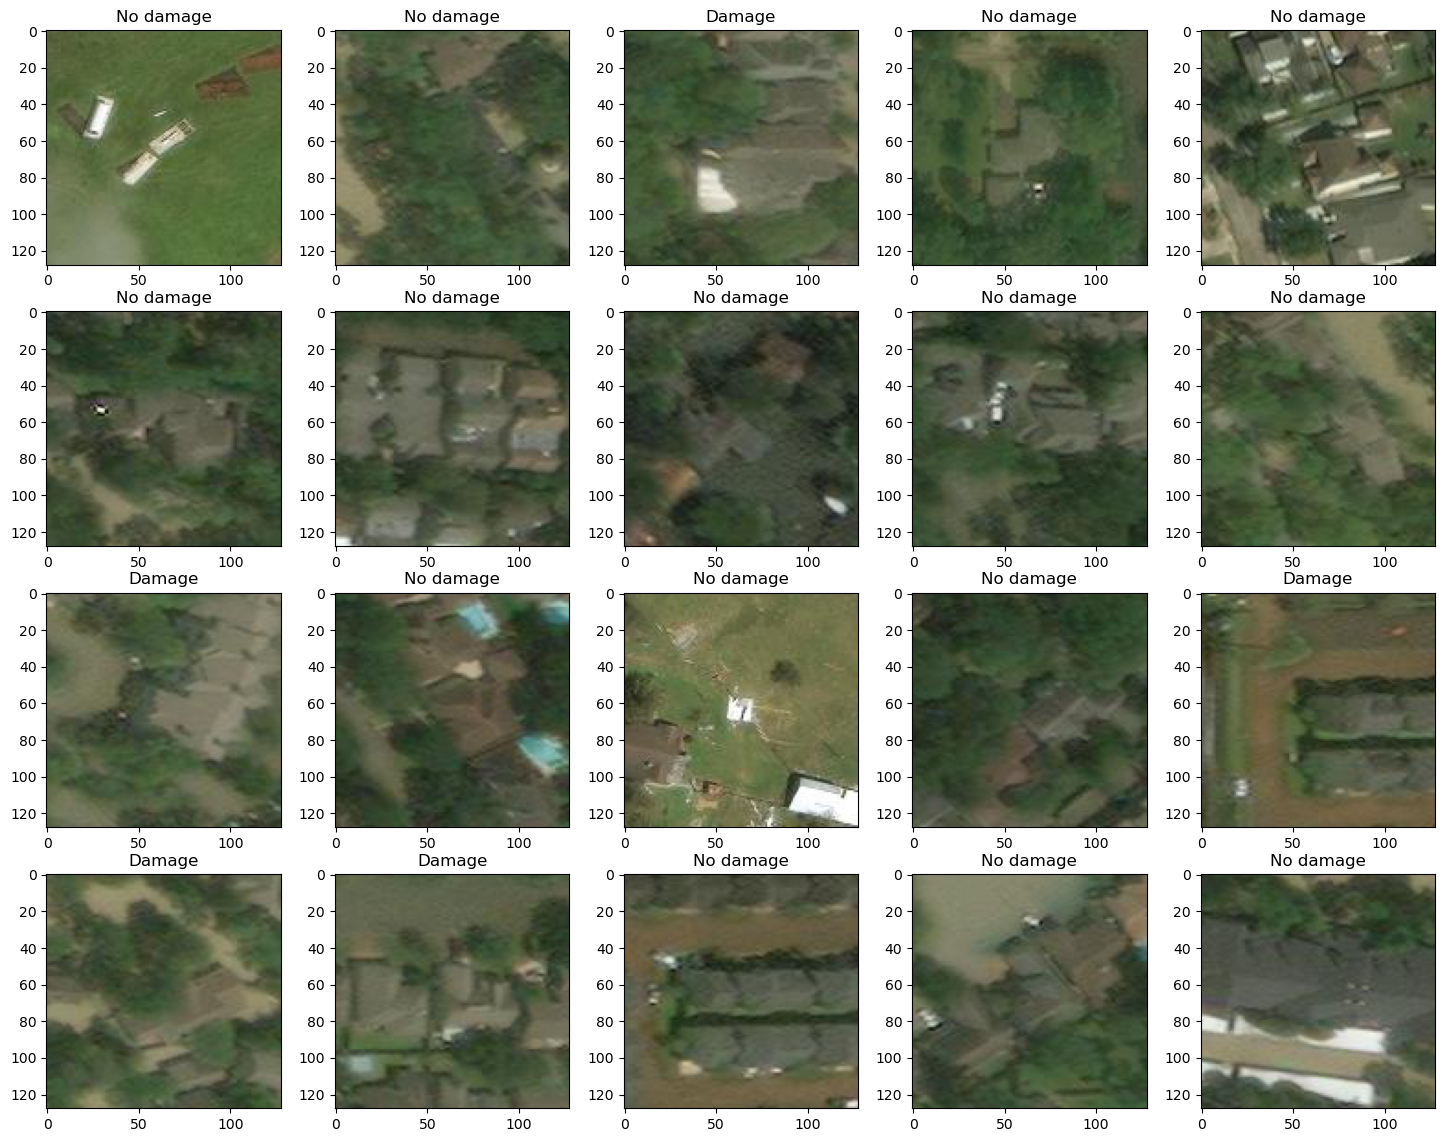

In [160]:
plt.figure(figsize = (18,14))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 0:
        plt.title("Damage")
    elif pred[i] == 1:
        plt.title("No damage")

### Confusion matrix

<Axes: >

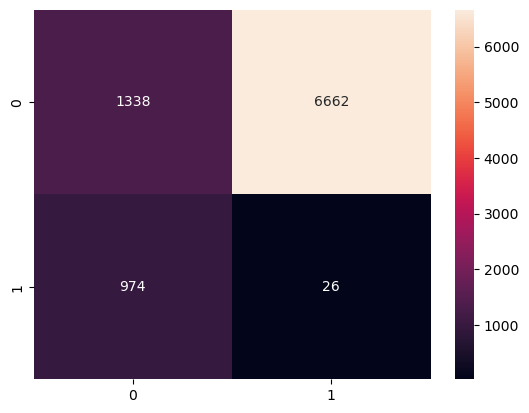

In [166]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt ='d')